# Understand Customers

**Tasks**:

0. Please read the `customers.csv` file to use as your dataset to explore the following:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customers.csv', parse_dates=['dob'], index_col='customer_id')
df.head()

,name,dob,gender,visits
customer_id,,,,
1,Jamila,1989-01-12,F,23
2,Omar,1983-04-03,M,17
3,Murad,1993-12-09,M,12
4,Aaliyah,1977-09-14,F,38
5,Abdulrahman,1991-02-18,M,10



1. rename column: dob to date_of_birth

In [3]:
df.rename(columns={'dob': 'date_of_birth'}, inplace=True)
df.head()

,name,date_of_birth,gender,visits
customer_id,,,,
1,Jamila,1989-01-12,F,23
2,Omar,1983-04-03,M,17
3,Murad,1993-12-09,M,12
4,Aaliyah,1977-09-14,F,38
5,Abdulrahman,1991-02-18,M,10


2. inspect the gender column and handle any inconsistencies (hint: `value_counts`)


In [4]:
df['gender'].value_counts()

gender
M         26
F         18
Female     4
Male       2
Name: count, dtype: int64

In [5]:
df['gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
df['gender'].value_counts()

gender
Male      28
Female    22
Name: count, dtype: int64

3. add new column: age_in_days


In [6]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

In [7]:

df['age_in_days'] = (pd.Timestamp.now() - df['date_of_birth']).dt.days

4. add new column: month_of_birth (hint: use `df[<column>].dt.month`)


In [8]:
df['month_of_birth'] = df['date_of_birth'].dt.month

5. save the dataset to a new file: `customers_cleaned.csv`


In [9]:
df.to_csv('customers_cleaned.csv')

6. average number of visits


In [10]:
df['visits'].mean()

25.68

7. list the 5 most common names of customers and the 5 least common names


In [11]:
name_counts = df['name'].value_counts().sort_values(ascending=False)
print(name_counts.head(5))
print(name_counts.tail(5))

name
Omar        2
Layla       2
Abdullah    1
Karim       1
Murad       1
Name: count, dtype: int64
name
Munira    1
Dalia     1
Nawaf     1
Amira     1
Zahra     1
Name: count, dtype: int64


8. the age range of male customers


9. the age range of female customers


In [12]:
df['age'] = df['age_in_days'] // 365
df['age'].head()

customer_id
1    35
2    41
3    30
4    46
5    33
Name: age, dtype: int64

In [13]:
print('max:', df['age'].max())
print('min:', df['age'].min())
print('range:', df['age'].max() - df['age'].min())

max: 46
min: 13
range: 33


In [14]:
male = df.loc[df['gender'] == 'Male']
print('max:', male['age'].max())
print('min:', male['age'].min())
print('range:', male['age'].max() - male['age'].min())

max: 41
min: 13
range: 28


In [15]:
female = df.loc[df['gender'] == 'Female']
print('max:', female['age'].max())
print('min:', female['age'].min())
print('range:', female['age'].max() - female['age'].min())

max: 46
min: 19
range: 27


10. what is the difference between the oldest and youngest customer? (hint: use `max` and `min`)


In [16]:
print('difference:', df['age'].max() - df['age'].min())

difference: 33


11. the mean age of customers grouped by gender (hint: use `groupby` and `mean`)


In [17]:
df.groupby('gender')['age'].mean()

gender
Female    30.409091
Male      26.464286
Name: age, dtype: float64

12. count the number of customers born in each month


In [18]:
born = df.groupby(['month_of_birth']).size()
born

month_of_birth
1      7
2     10
3      3
4      5
5      3
6      4
7      2
8      2
9      3
10     3
11     4
12     4
dtype: int64

13. plot the number of customers born in each month


<Axes: title={'center': 'Number of customers born in each month'}, xlabel='month_of_birth'>

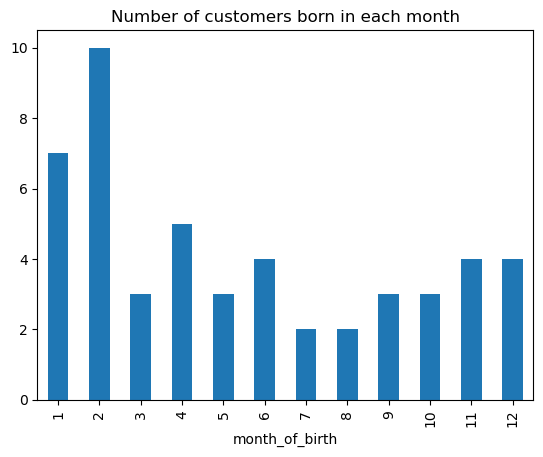

In [19]:
born.plot(kind='bar', title='Number of customers born in each month')

14. plot the histogram of age for both genders, and then separately (males and females)


<Axes: title={'center': 'Age distribution of customers'}, ylabel='Frequency'>

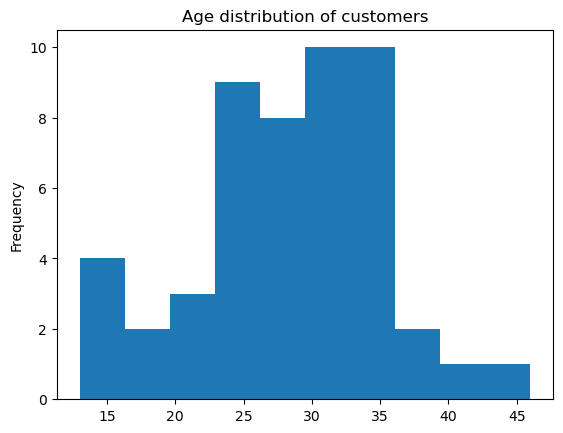

In [20]:
df['age'].plot(kind='hist', title='Age distribution of customers')

<Axes: title={'center': 'Age distribution of male customers'}, ylabel='Frequency'>

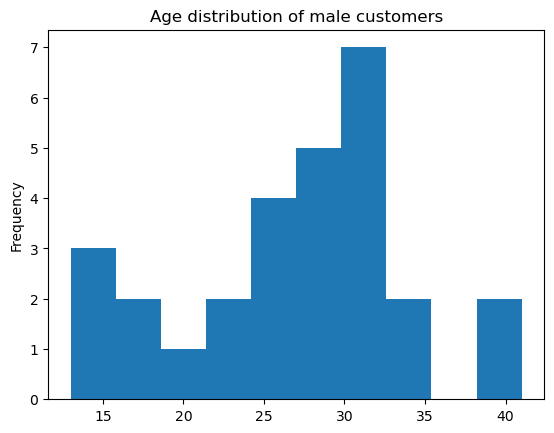

In [21]:
male['age'].plot(kind='hist', title='Age distribution of male customers')

<Axes: title={'center': 'Age distribution of female customers'}, ylabel='Frequency'>

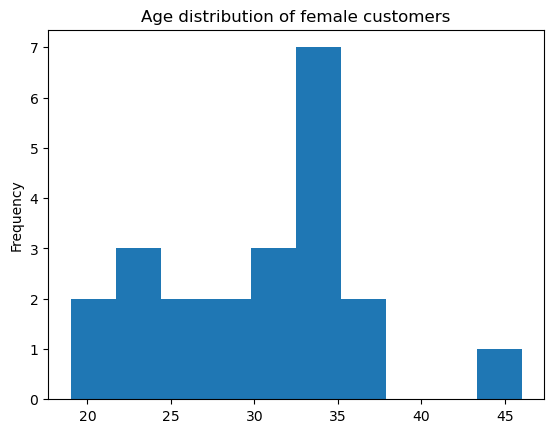

In [22]:
female['age'].plot(kind='hist', title='Age distribution of female customers')

15. scatter plot of age vs. visits (is there a correlation?)


<Axes: title={'center': 'Age vs. visits'}, xlabel='age', ylabel='visits'>

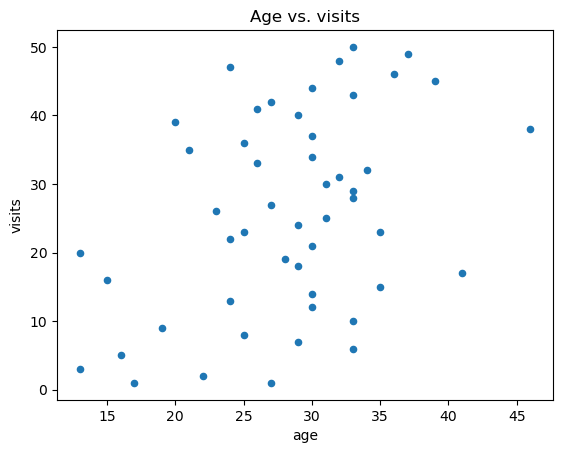

In [23]:
df.plot(kind='scatter', x='age', y='visits', title='Age vs. visits')

It doesn't seem that there is correlation between age and visits.

16. use `pd.cut` to create age groups and then plot the number of visits for each age group: 0-20, 21-40, 41-60, 61-80, 81-100


In [33]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100])

<Axes: title={'center': 'Total visits by age group'}, xlabel='age_group'>

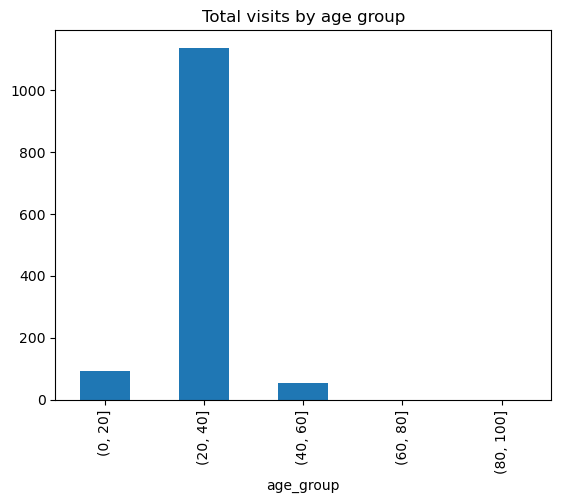

In [39]:
df.groupby('age_group')['visits'].sum().plot(kind='bar', title='Total visits by age group')

17. is there any significant difference between the number of visits for older people vs. younger people? (hint: plot the number of visits for each age group)

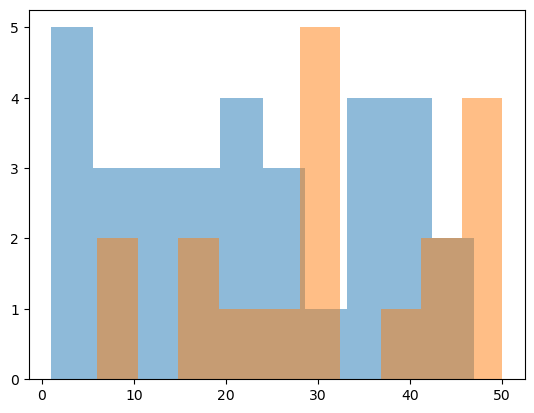

In [52]:
from matplotlib import pyplot

is_young = df['age'] <= 30

pyplot.hist(df[is_young]['visits'], alpha=0.5, label='x')
pyplot.hist(df[~is_young]['visits'], alpha=0.5, label='y')
# pyplot.legend(loc='upper right')
pyplot.show()
